In [1]:
#imports 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
from sklearn.model_selection import train_test_split

In [2]:
#Loads the datset
BASE_DIR = "C:/Users/DELL/Desktop/SRM2025IISERM/katz_cyclic_vector_ml"
csv_path = os.path.join(BASE_DIR, "data", "raw", "samples_n3.csv")
df = pd.read_csv(csv_path)
print("✅ Loaded data:", df.shape)
df.head()

✅ Loaded data: (10000, 21)


,D_00,D_01,D_02,D_10,D_11,D_12,D_20,D_21,D_22,e0_0,...,e0_2,e1_0,e1_1,e1_2,e2_0,e2_1,e2_2,a,t,cyclic
0,0.0,4.0,4.0,0.0,1.0,2.0,0.0,4.0,3.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4,1.0,1
1,3.0,3.0,4.0,2.0,0.0,1.0,2.0,0.0,3.0,1.0,...,1.0,1.0,0.0,0.0,1.0,1.0,0.0,4,1.0,1
2,1.0,1.0,0.0,3.0,0.0,2.0,2.0,3.0,1.0,1.0,...,0.0,1.0,0.0,1.0,1.0,1.0,0.0,5,1.0,1
3,2.0,3.0,0.0,3.0,2.0,0.0,4.0,3.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,1.0,2,1.0,1
4,0.0,4.0,2.0,0.0,2.0,4.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1,1.0,0


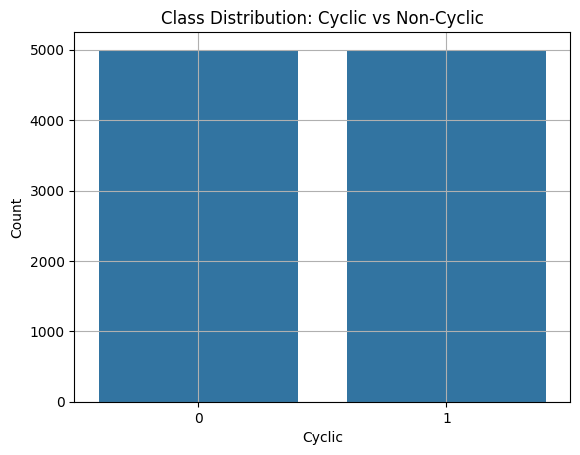

In [3]:
#Class distribution
sns.countplot(data=df, x='cyclic')
plt.title("Class Distribution: Cyclic vs Non-Cyclic")
plt.xlabel("Cyclic")
plt.ylabel("Count")
plt.grid(True)
plt.show()

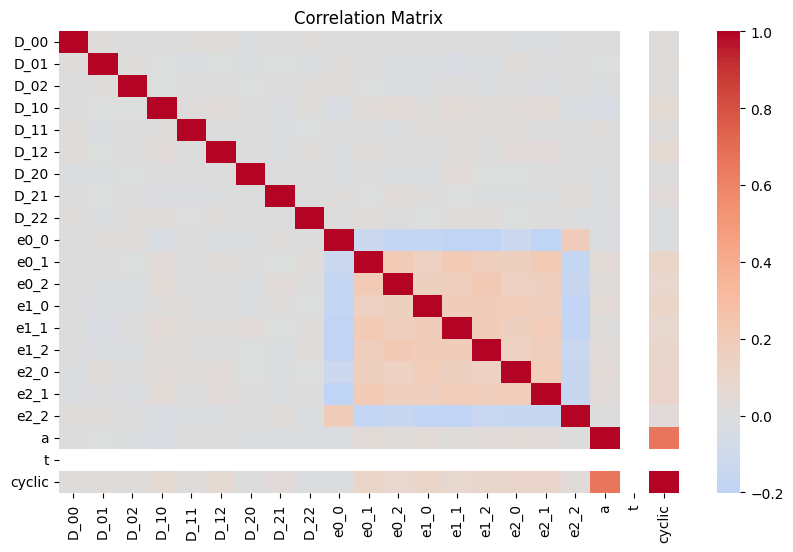

In [4]:
#Check correlations
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), cmap='coolwarm', center=0, annot=False)
plt.title("Correlation Matrix")
plt.show()

In [5]:
#Feature + label split
X = df.drop(columns=['cyclic'])
y = df['cyclic']

print("✅ Feature matrix shape:", X.shape)
print("✅ Labels shape:", y.shape)

✅ Feature matrix shape: (10000, 20)
✅ Labels shape: (10000,)


In [6]:
#Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)

print(f"✅ Training set: {X_train.shape[0]} samples")
print(f"✅ Test set: {X_test.shape[0]} samples")

✅ Training set: 7000 samples
✅ Test set: 3000 samples


In [7]:
#Save to processed data files
os.makedirs('../data/processed', exist_ok=True)
X_train.to_csv('../data/processed/X_train.csv', index=False)
X_test.to_csv('../data/processed/X_test.csv', index=False)
y_train.to_csv('../data/processed/y_train.csv', index=False)
y_test.to_csv('../data/processed/y_test.csv', index=False)

print("✅ Train/test splits saved.")

✅ Train/test splits saved.
